# Analyzing the performance of centralized models

The results are stored in one big JSON file `metrics_<datasize>.json`. Structure is as follows:
```jsonc
{
    "epochs": 10,                                           // number of epochs
    "batch_size": 128,                                      // batch size
    "runs": {                       
        "botiot_sampled.csv": {                             // each dataset is a separate run
            "stats": {                                      // stats about the dataset      
                "attack_train_samples": {
                    "DDoS": 388101,
                    // ...
                },
                "attack_test_samples": {
                    "DDoS": 97025,
                    // ...
                },
                "train_size": 2855,
                "test_size": 200000
            },
            "eval": [                                       // evaluation metrics for each round
                [
                    0,                                      // round number
                    {
                        "accuracy": 0.09403,                // metrics for the round
                        // ...
                        "attack_stats": [                   // attack stats for the round
                            {
                                "attack": "DDoS",
                                "count": 48461,
                                "correct": 28,
                                "missed": 48433,
                                "percentage": "0.06%"
                            },
                            // ...
                        ]
                    }
                ],
                // ...
            ]
        },
        // ...
    }
}
```

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# --------------------------------------------------------------------------------------
results = json.load(Path("./metrics_full.json").open())
runs = results["runs"]
metric = "accuracy"
rounds = [r + 1 for r in range(len(next(iter(runs.values()))["eval"]))]
# --------------------------------------------------------------------------------------

### Dataset analysis

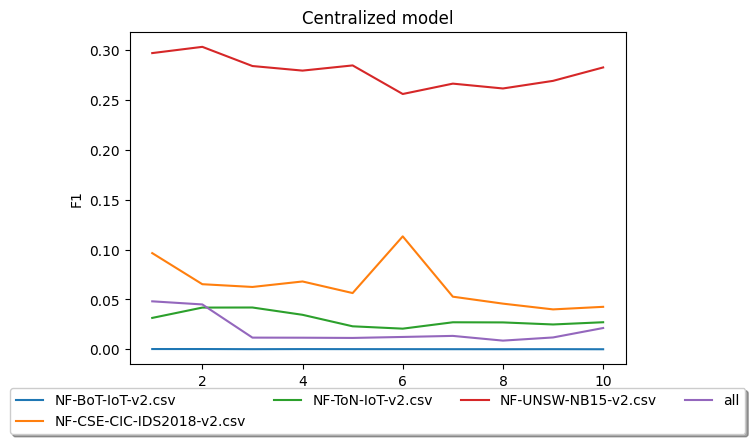

In [3]:
plt.figure()
plt.title("Centralized model")
plt.xlabel("Round")
plt.ylabel(metric.title())
ax = plt.subplot(111)


for dataset, run in runs.items():

    stats = run["stats"]
    evals = run["eval"]

    points = [e[1][metric] for e in evals]

    ax.plot(
        rounds,
        points,
        label=f"{dataset}",
    )

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4
)
